# GGIS 371: Week 4 - Point Patterns Basics
**By: G. McCreary & B. Witter, 2/12/2026**

[Reading: Chapter 8.1: Point Pattern Analysis](https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#point-pattern-analysis)

**Goals for this week:**
- Learn about different ways of visualizing density of points cartographically
- Learn how to visualize point pattern density in Python with different techniques
- Understand the role of enumeration units in point pattern density maps


## The Dataset

This week we are using the **Tokyo** dataset from week 2 that contains geo-tagged photos from Flickr that users have taken all around Tokyo from the years 1923 to 2017.

First we want to import our csv dataset into our notebook with the pandas function `read_csv`

In [6]:
import pandas as pd

tokyo_df = pd.read_csv("./data/tokyo_small.csv")

In [7]:
tokyo_df.head()

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06


We can also do some further exploration about the dates the photos were taken with in with the built-in `.min` and `.max` fuctions in Python!

In [8]:
tokyo_df["date_taken"].min() # finding the earliest date

'1923-09-01 00:00:00.0'

In [9]:
tokyo_df["date_taken"].max() # finding the latest date 

'2017-05-14 17:21:16.0'

## Point Pattern Density

Point pattern density shows us the exact location of every point in our dataset based on the latitude and longitude values for each point, and together they can give us an idea of the frequency that something occurs in different locations, such as with the amount of photos taken at a specific location.

The `seaborn` package lets us create better and more customizable statisical graphs and visializations, today we're going to use it to make a scatter plot.

Our scatter plot is going to consist of all our Tokyo data points plotted with our x value as longitude and y and latitude to get a spatial visualization of our data.

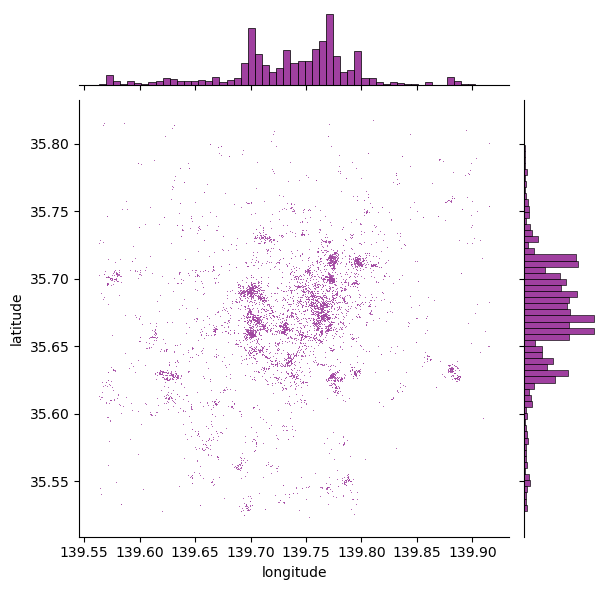

In [5]:
import seaborn

# We create a scatter plot with logitude and latitude as out x and y values.

seaborn.jointplot(x="longitude", y="latitude", data=tokyo_df, s=0.5, color = "purple")

#### Adding Context

But without a basemap we don't have very much context about where these points are, and the spatial component is really hard to understand so a base map will be invaluable in our visualization. 

Like we did in lab 2, we want to use the package `contextily` to import and add a tiled basemap to our scatter plot.

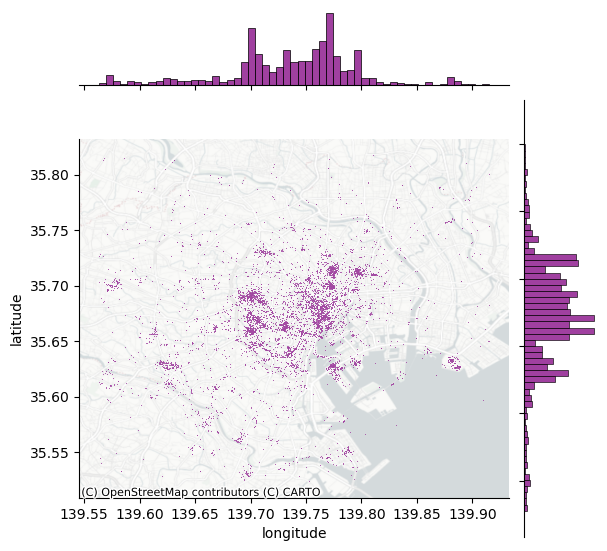

In [11]:
import contextily as cx

# Adding the context of a basemap w/ cx

joint_axes = seaborn.jointplot(
    x="longitude", y="latitude", data=tokyo_df, s=0.5, color = "purple"
)
cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels,
);

<div class="alert alert-block alert-info">
    <h3> Challenge </h3>
    <p>Subset the data to only include photos taken before or after a certain date, then visualize this with point pattern density (Hint: look at the format for dates in the dataset)</p>
</div>

In [12]:
tokyo_df_new = tokyo_df[tokyo_df["date_taken"] >= '2010-01-01 00:00:00.0']  # remove for final product

In [13]:
tokyo_df_new.head() # remove for final product

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06
8,71453924@N00,139.613662,35.662395,2010-04-06 10:03:41.0,http://www.flickr.com/photos/71453924@N00/5407...,1.554172e+07,4.254266e+06
9,67932864@N02,139.788730,35.712963,2012-07-08 13:10:55.0,http://www.flickr.com/photos/67932864@N02/7526...,1.556121e+07,4.261197e+06
10,39569656@N07,139.765942,35.635743,2012-08-10 04:06:16.0,http://www.flickr.com/photos/39569656@N07/9421...,1.555867e+07,4.250615e+06


In [9]:
tokyo_df_new["date_taken"].min() # checking the accuracy of the filter     # remove for final product

'2010-01-01 00:00:00.0'

In [10]:
tokyo_df_new["date_taken"].max()   # remove for final product

'2017-05-14 17:21:16.0'

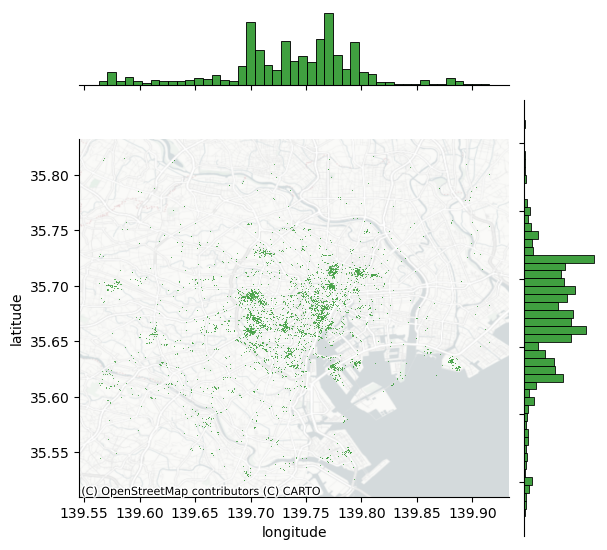

In [11]:
# Visualizing Photos from 2010 or earlier                      # remove for final product

joint_axes = seaborn.jointplot(
    x="longitude", y="latitude", data=tokyo_df_new, s=0.5, color = "green"
)
cx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.PositronNoLabels,
);

## Density & Hexbinning 

Our scatter plots show us a visual of where all our points are, however when there are many data points, as there often are, the points can cluster together and make seeing and understanding the patterns in the data more difficult. This is where mapping strategies that aggregate points based on a spatial and/or mathmatical units come in handy.

While there are techniques that aggregate through exact measurments (as we will see in the next section), in order to do this you generally need to have a discrete enumeration unit (like hexagons in hexbinning) or political boundaries (like counties or states). In this technique, the amount of points that lie within an enumeration unit is counted and the value is contained and usually represented using a certain color. 

In this section we are going to do this technique with hexbinning, where a grid is formed over the spatial area and hexagons are placed based on this grid and these hexagons serve as our enumeration unit.

In this lab, we are going to use the library `matplotlib.pyplot` to create our hexbin visualization, and customize it to make it a more accurate and visually appealing map. 

Text(0.5, 1.0, 'Hexbinned Density Plot for Photos in Tokyo')

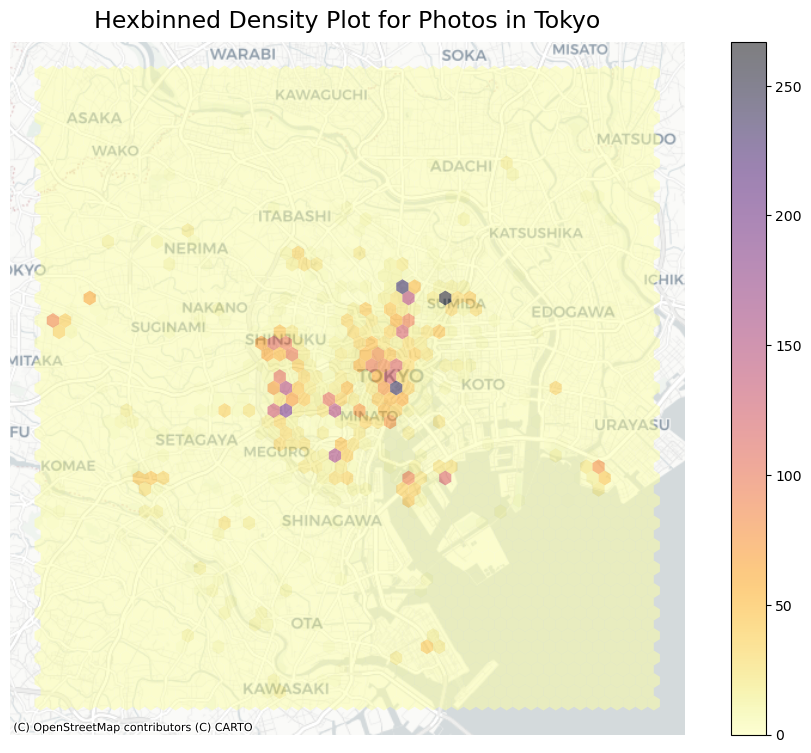

In [14]:
import matplotlib.pyplot as plt 

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    tokyo_df["x"],
    tokyo_df["y"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="inferno_r",
)

# Add basemap
cx.add_basemap(
    ax, source=cx.providers.CartoDB.Positron
)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()


# Add title
plt.title("Hexbinned Density Plot for Photos in Tokyo", pad= 10, fontsize = 17)

## Kernel Density Estimation (KDE)

We have gotten a step further in accurately portraying our data, but we can go even further. Using enumertaion units with hard boundaries, while useful, can lead to, as our text says, "discretization of an essentially contiguous phenomenon."

Kernel Density Estimation is a solution for this, as it uses a kernel function to calculate the amount of points in an area weighted by their distance relative to each other. This results in a smooth gradient of values/colors and portays the data as continuously instead of discretely and may more accurately show the reality of sociological boundaries (or lack there of). 

In this map we will use `matplotlib.pyplot` and `seaborn` leveraging the customizable strenth of `matplotlib.pyplot` visualizations with the powerful and straight-forward fuctions of `seaborn`

Text(0.5, 1.0, 'Kernel Density Estimation Plot for Photos in Tokyo')

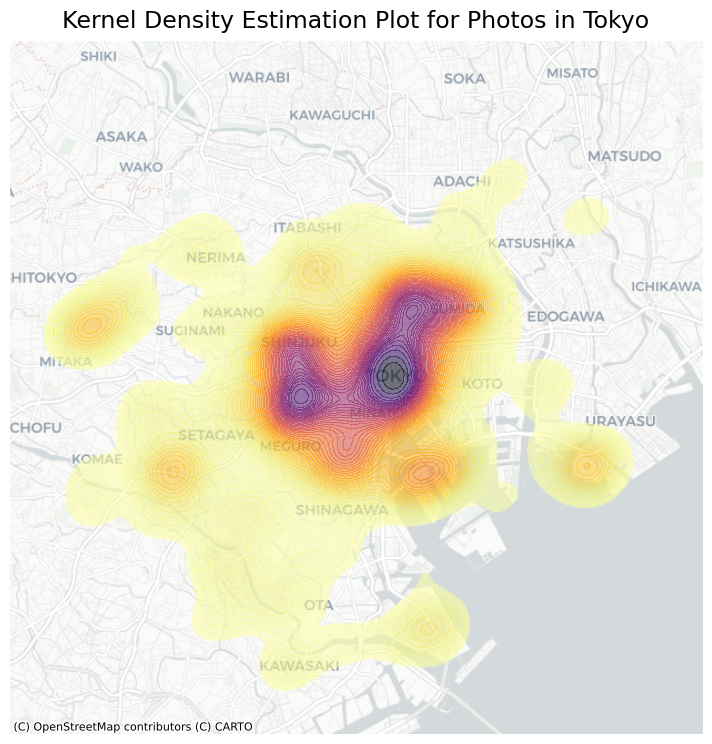

In [13]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse inferno colormap
seaborn.kdeplot(
    x="x",
    y="y",
    data=tokyo_df,
    n_levels=50,
    fill=True,
    alpha=0.55,
    cmap="inferno_r",
)


# Add basemap
cx.add_basemap(
    ax, source=cx.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()

# Add title
plt.title("Kernel Density Estimation Plot for Photos in Tokyo", pad= 10, fontsize = 17)

<div class="alert alert-block alert-info">
    <h3> Challenge </h3>
    <p>Play with the customizable aspects of <code>seaborn</code> and <code>matplotlib.pyplot</code>! Check out the documentation for the packages for the different color palettes that are available.</p>
</div>

## Dive Deeper!

Kernel Density Estimation removes the need for discrete categories, however this might not always be the correct choice. The default Gaussian kernel uses a bell-shaped curve, where density is highest at the point and gradually decreases with distance. Other kernels (such as Epanechnikov or triangular) use slightly different shapes to control how density declines, which can subtly affect how clusters appear. What scenarios would KDE not be ideal? Try to edit the code for the KDE map to change the arguments of the type of kernel (kernel) and the size of the bandwidth (bw or bw_adjust) (What happens to your map when the bandwidth is super small?). Explore the documentation for the function we use seaborn.kdeplot to understand what these arguments control.

In [30]:
import matplotlib.pyplot as plt

In [31]:
import contextily as cx

In [32]:
import seaborn

In [ ]:
import pandas as pd
tokyo_df = pd.read_csv("GGIS_Spatial_Analysis/data/tokyo_small.csv")

In [ ]:
# Default KDE (Gaussian kernel, default bandwidth)
f, ax = plt.subplots(1, figsize=(9, 9))

seaborn.kdeplot(
    x="x",
    y="y",
    data=tokyo_df,
    n_levels=50,
    fill=True,
    alpha=0.55,
    cmap="inferno_r",
    bw_adjust=1
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

plt.title("Default Gaussian KDE", fontsize=17)


Text(0.5, 1.0, 'KDE with Small Bandwidth (bw_adjust=0.3)')

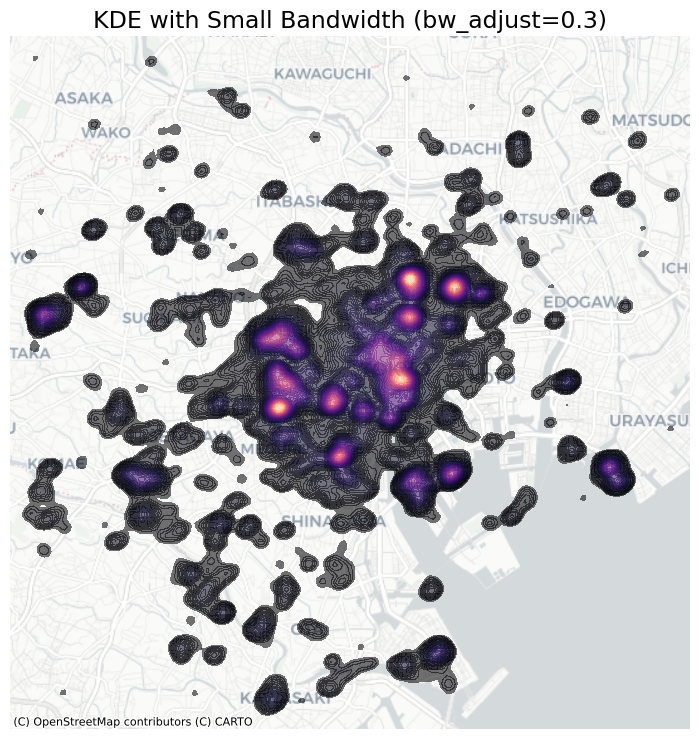

In [40]:
# Smaller bandwidth (less smoothing)
f, ax = plt.subplots(1, figsize=(9, 9))

seaborn.kdeplot(
    x="x",
    y="y",
    data=tokyo_df,
    n_levels=50,
    fill=True,
    alpha=0.55,
    cmap="magma",
    bw_adjust="smaller_bandwidth"
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

plt.title("KDE with Small Bandwidth (bw_adjust=0.3)", fontsize=17)


/tmp/ipykernel_107/2276754982.py:4: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  seaborn.kdeplot(


Text(0.5, 1.0, 'KDE with Epanechnikov Kernel')

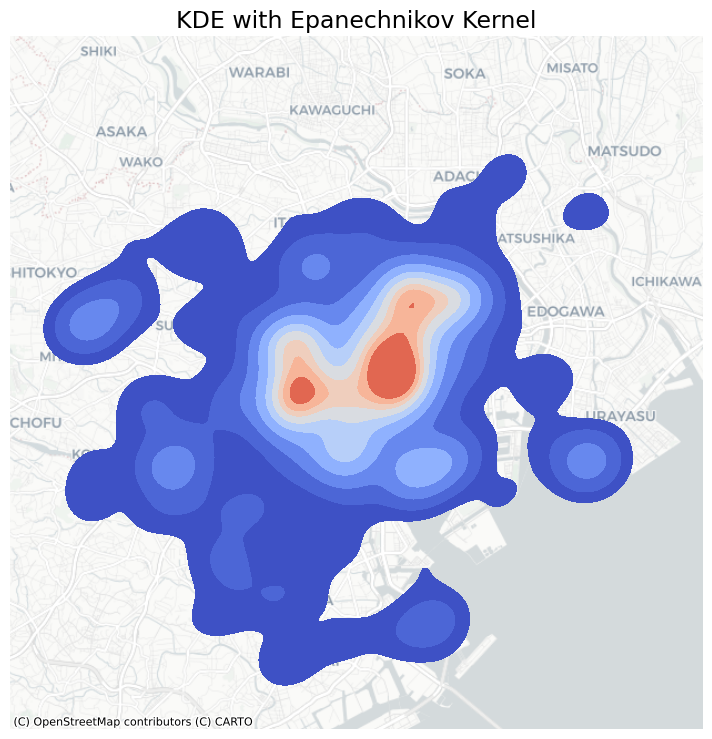

In [39]:
# Change kernel type
f, ax = plt.subplots(1, figsize=(9, 9))

seaborn.kdeplot(
    x="x",
    y="y",
    data=tokyo_df,
    fill=True,
    cmap="coolwarm",
    bw_adjust=1,
    kernel="epa"   # Epanechnikov kernel
)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

plt.title("KDE with Epanechnikov Kernel", fontsize=17)
